# 分類のサンプル集

In [3]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## データ可視化

In [44]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)

df_y = pd.DataFrame(iris.target, columns=["iris_name"])

df_all = pd.concat([df_X, df_y], axis=1)
df_all.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df_all.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


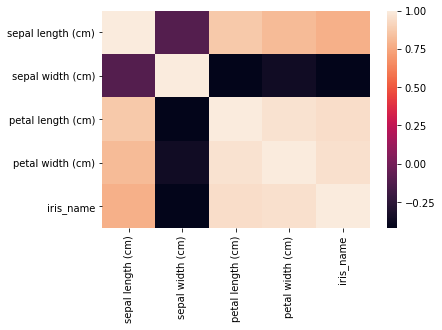

In [11]:
sns.heatmap(df_all.corr())

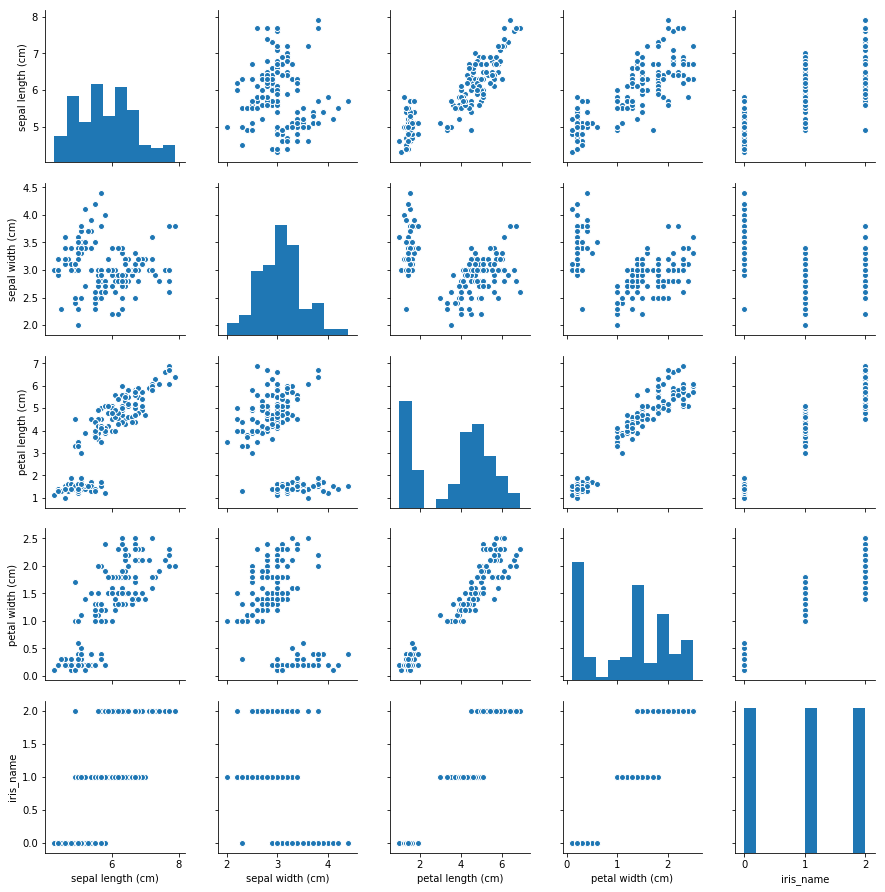

In [12]:
sns.pairplot(df_all)

In [71]:
# 便利関数
def my_scatter(df_X, target, name1, name2):    
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.scatter(df_X[name1], df_X[name2], c=target, cmap=plt.cm.Vega10)


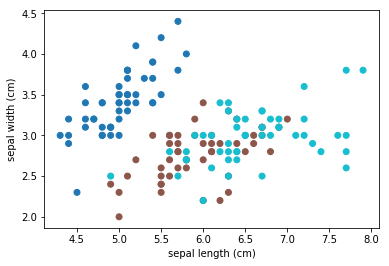

In [73]:
my_scatter(df_X, iris.target, "sepal length (cm)", "sepal width (cm)")

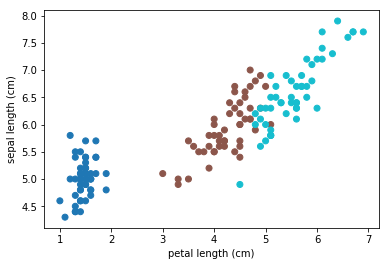

In [76]:
my_scatter(df_X, iris.target, "petal length (cm)", "sepal length (cm)")

# 学習

## ロジスティック回帰

In [89]:
from sklearn.linear_model import LogisticRegression

X = df_X.values[:, :2]
y = df_y.values.reshape(-1)

log_reg = LogisticRegression()


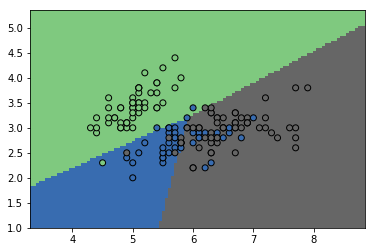

In [90]:
def my_mesh(model, X, y):
    model.fit(X,y)
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    result_all_mesh=model.predict(np.array([xx.reshape(-1), yy.reshape(-1)]).T)
    result_all_mesh = result_all_mesh.reshape(xx.shape)

    plt.pcolormesh(xx, yy, result_all_mesh, cmap=plt.cm.Accent)
    plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='K', cmap=plt.cm.Accent)
    plt.show()

my_mesh(log_reg, X, y)
    

## SVM

In [86]:
from sklearn.svm import SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

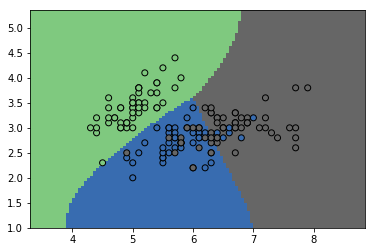

In [96]:
my_mesh(SVC(), X,y)